In [1]:
# Cell 1: Install Required Libraries
"""
!pip install pandas numpy scikit-learn nltk flask PyPDF2
"""

'\n!pip install pandas numpy scikit-learn nltk flask PyPDF2\n'

In [2]:
# Cell 2: Import Libraries
import pandas as pd
import numpy as np
import re
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\NAVYA
[nltk_data]     SAI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Cell 3: Define Skill Database and Keywords
SKILL_DB = [
    "python", "java", "c", "c++", "html", "css", "javascript",
    "machine learning", "deep learning", "sql", "mongodb",
    "react", "node", "data analysis", "nlp", "ai", "ml",
    "tensorflow", "pytorch", "docker", "kubernetes", "aws",
    "azure", "git", "flask", "django", "fastapi", "pandas",
    "numpy", "scikit-learn", "data science", "analytics"
]

EXPERIENCE_KEYWORDS = [
    "developed", "managed", "led", "created", "designed",
    "implemented", "built", "architected", "optimized",
    "years of experience", "work experience", "internship"
]

PROJECT_KEYWORDS = [
    "project", "portfolio", "built", "created", "developed",
    "implemented", "designed", "application", "system", "website"
]

In [4]:
# Cell 4: Create Custom Resume Dataset
def create_resume_dataset():
    """Create a custom resume dataset with IT and Marketing profiles"""
    
    resumes = [
        # IT Resumes
        "Python developer with 5 years experience in machine learning and deep learning. Skilled in TensorFlow, PyTorch, scikit-learn. Built multiple AI projects including NLP chatbots.",
        "Full stack developer proficient in JavaScript, React, Node.js, MongoDB. Developed 10+ web applications. Experience with HTML, CSS, and REST APIs.",
        "Data scientist with expertise in Python, SQL, data analysis, and machine learning. Created predictive models using scikit-learn and pandas. Strong analytical skills.",
        "Software engineer specializing in Java, C++, and Python. Led development of distributed systems. Experience with Docker, Kubernetes, and cloud platforms AWS.",
        "AI/ML engineer with deep learning expertise. Implemented computer vision projects using TensorFlow and PyTorch. Skilled in NLP and data preprocessing.",
        "Backend developer with Node.js, Python Flask, FastAPI experience. Built scalable REST APIs. Proficient in SQL and MongoDB databases.",
        "Web developer skilled in HTML, CSS, JavaScript, React. Created responsive websites. Experience with Git version control and agile methodologies.",
        "Data analyst with SQL, Python, and data visualization skills. Performed statistical analysis. Created dashboards using pandas and numpy.",
        
        # Marketing Resumes
        "Marketing manager with 7 years experience in digital marketing campaigns. Expert in SEO, SEM, social media marketing. Increased brand awareness by 300%.",
        "Content marketing specialist skilled in copywriting, content strategy, and social media management. Created engaging campaigns across multiple platforms.",
        "Brand manager with expertise in market research, consumer behavior analysis. Led successful product launches and rebranding initiatives.",
        "Digital marketing expert proficient in Google Ads, Facebook advertising, email marketing. Generated high ROI campaigns with data-driven strategies.",
        "Social media manager experienced in community management, influencer partnerships. Grew follower base by 500% through creative campaigns.",
        "Marketing analyst with strong analytical skills in market segmentation and competitive analysis. Used Excel and analytics tools for insights.",
        "Public relations specialist skilled in media relations, press release writing. Built strong relationships with journalists and media outlets.",
        "Product marketing manager with B2B and B2C experience. Developed go-to-market strategies and positioning for new products."
    ]
    
    labels = ['IT'] * 8 + ['Marketing'] * 8
    
    df = pd.DataFrame({
        'resume': resumes,
        'label': labels
    })
    
    return df

In [5]:
# Cell 5: Skill Extraction Function
def extract_skills(text):
    """Extract skills from resume text"""
    text_lower = text.lower()
    found_skills = []
    
    for skill in SKILL_DB:
        if skill.lower() in text_lower:
            found_skills.append(skill)
    
    return found_skills

In [6]:
# Cell 6: Experience Detection
def detect_experience(text):
    """Detect experience mentions in resume"""
    text_lower = text.lower()
    experience_count = 0
    
    for keyword in EXPERIENCE_KEYWORDS:
        if keyword in text_lower:
            experience_count += 1
    
    # Extract years of experience
    years_pattern = r'(\d+)\s*(?:years?|yrs?)(?:\s+of)?\s+(?:experience|exp)'
    years_match = re.search(years_pattern, text_lower)
    years = int(years_match.group(1)) if years_match else 0
    
    return {
        'experience_keywords': experience_count,
        'years': years
    }


In [7]:
# Cell 7: Project Detection
def detect_projects(text):
    """Detect project mentions in resume"""
    text_lower = text.lower()
    project_count = 0
    
    for keyword in PROJECT_KEYWORDS:
        if keyword in text_lower:
            project_count += 1
    
    return project_count

In [8]:
# Cell 8: Calculate Fit Score
def calculate_fit_score(resume_text, job_description):
    """Calculate fit score based on multiple factors"""
    
    # Extract skills
    resume_skills = set(extract_skills(resume_text))
    job_skills = set(extract_skills(job_description))
    
    # Skill match score (40%)
    if len(job_skills) > 0:
        skill_match = len(resume_skills.intersection(job_skills)) / len(job_skills)
    else:
        skill_match = 0
    
    # Experience score (30%)
    exp_data = detect_experience(resume_text)
    exp_score = min(exp_data['years'] / 10, 1.0) * 0.5 + min(exp_data['experience_keywords'] / 5, 1.0) * 0.5
    
    # Project score (30%)
    project_count = detect_projects(resume_text)
    project_score = min(project_count / 5, 1.0)
    
    # Weighted total
    fit_score = (skill_match * 0.4 + exp_score * 0.3 + project_score * 0.3) * 100
    
    return {
        'fit_score': round(fit_score, 2),
        'matched_skills': list(resume_skills.intersection(job_skills)),
        'total_skills': list(resume_skills),
        'experience_years': exp_data['years'],
        'project_count': project_count
    }


In [9]:
# Cell 9: Load and Prepare Dataset
print("Creating resume dataset...")
df = create_resume_dataset()
print(f"Dataset created with {len(df)} resumes")
print(f"\nLabel distribution:\n{df['label'].value_counts()}")
print(f"\nSample resume:\n{df['resume'].iloc[0][:200]}...")


Creating resume dataset...
Dataset created with 16 resumes

Label distribution:
label
IT           8
Marketing    8
Name: count, dtype: int64

Sample resume:
Python developer with 5 years experience in machine learning and deep learning. Skilled in TensorFlow, PyTorch, scikit-learn. Built multiple AI projects including NLP chatbots....


In [10]:
# Cell 10: Text Preprocessing and Feature Extraction
print("\nPreprocessing and extracting features...")

stop_words = set(stopwords.words('english'))

tfidf_vectorizer = TfidfVectorizer(
    max_features=100,
    stop_words='english',
    lowercase=True,
    ngram_range=(1, 2)
)

X = tfidf_vectorizer.fit_transform(df['resume'])
y = df['label']

print(f"Feature matrix shape: {X.shape}")


Preprocessing and extracting features...
Feature matrix shape: (16, 100)


In [11]:
# Cell 11: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 11
Test set size: 5


In [12]:
# Cell 12: Model Training
print("\nTraining Logistic Regression model...")

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

print("Model training completed!")


Training Logistic Regression model...
Model training completed!


In [13]:
# Cell 13: Model Evaluation
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{classification_report(y_test, predictions)}")


Model Accuracy: 80.00%

Confusion Matrix:
[[2 1]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

          IT       1.00      0.67      0.80         3
   Marketing       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [14]:
# Cell 14: Save Model and Vectorizer
print("\nSaving model and vectorizer...")

with open('resume_classifier_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

print("Model and vectorizer saved successfully!")


Saving model and vectorizer...
Model and vectorizer saved successfully!


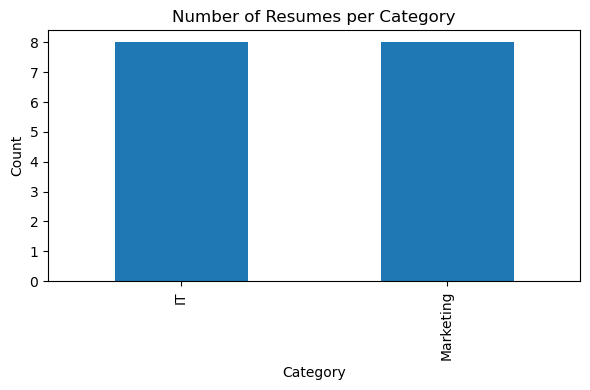

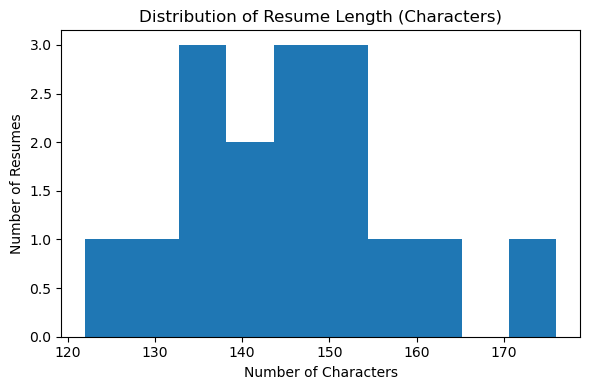

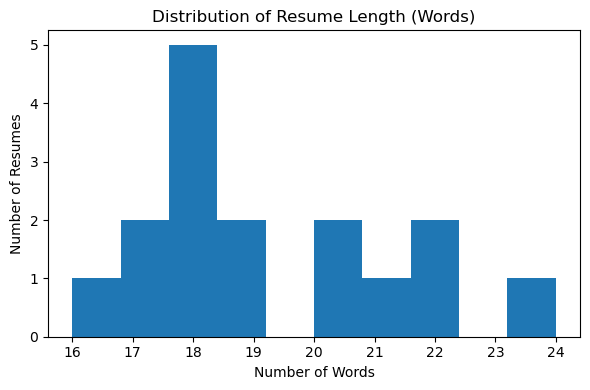

C:\Users\NAVYA SAI\AppData\Local\Temp\ipykernel_37240\1519461448.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


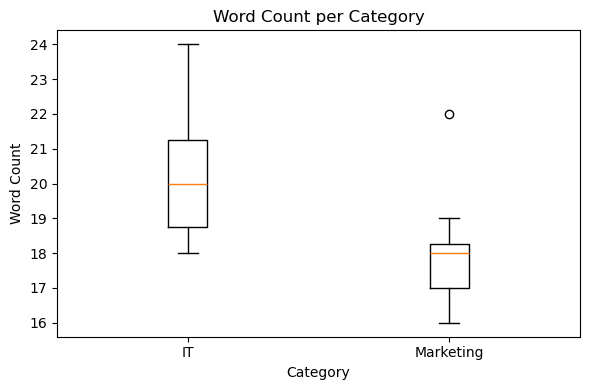

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# If needed, recreate df (uncomment this part only if df is not already defined)
# df = create_resume_dataset()

df['resume_length'] = df['resume'].str.len()
df['word_count'] = df['resume'].str.split().str.len()

plt.figure(figsize=(6,4))
df['label'].value_counts().plot(kind='bar')
plt.title('Number of Resumes per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['resume_length'], bins=10)
plt.title('Distribution of Resume Length (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Number of Resumes')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['word_count'], bins=10)
plt.title('Distribution of Resume Length (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Resumes')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
labels = df['label'].unique()
data = [df[df['label'] == lab]['word_count'] for lab in labels]
plt.boxplot(data, labels=labels)
plt.title('Word Count per Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()


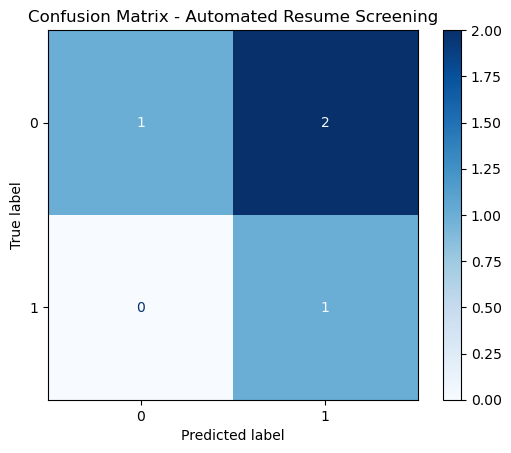

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = df['resume']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Automated Resume Screening")
plt.show()


In [17]:
# Cell 15: Test the Complete System
def analyze_resume(resume_text, job_description):
    """Complete analysis of a resume against a job description"""
    
    # Predict category
    resume_vector = tfidf_vectorizer.transform([resume_text])
    category = model.predict(resume_vector)[0]
    category_prob = model.predict_proba(resume_vector)[0]
    
    # Calculate fit score
    fit_data = calculate_fit_score(resume_text, job_description)
    
    return {
        'category': category,
        'category_confidence': round(max(category_prob) * 100, 2),
        'fit_score': fit_data['fit_score'],
        'matched_skills': fit_data['matched_skills'],
        'total_skills': fit_data['total_skills'],
        'experience_years': fit_data['experience_years'],
        'project_count': fit_data['project_count']
    }

In [18]:
# Cell 16: Demo Analysis
import pickle

# Load trained model and vectorizer
with open('resume_classifier_model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

# Your analyze_resume as in the project
def analyze_resume(resume_text, job_description):
    resume_vector = tfidf_vectorizer.transform([resume_text])
    category = model.predict(resume_vector)[0]
    category_prob = model.predict_proba(resume_vector)[0]

    fit_data = calculate_fit_score(resume_text, job_description)

    return {
        'category': category,
        'category_confidence': round(max(category_prob) * 100, 2),
        'fit_score': fit_data['fit_score'],
        'matched_skills': fit_data['matched_skills'],
        'total_skills': fit_data['total_skills'],
        'experience_years': fit_data['experience_years'],
        'project_count': fit_data['project_count']
    }

# Your demo code – this will now work
sample_resume = """
Senior Python Developer with 6 years of experience in machine learning and AI. 
Expert in deep learning frameworks like TensorFlow and PyTorch. Built 15+ ML projects 
including NLP chatbots and computer vision systems. Proficient in data analysis using 
pandas, numpy, and scikit-learn. Strong experience with Flask, FastAPI, and SQL databases.
"""

sample_job = """
Looking for Python developer with machine learning experience. Must know TensorFlow, 
scikit-learn, and NLP. Experience with Flask or FastAPI required. SQL knowledge preferred.
"""

print("\n" + "="*60)
print("DEMO: Resume Analysis")
print("="*60)

result = analyze_resume(sample_resume, sample_job)

print(f"\nCategory: {result['category']}")
print(f"Category Confidence: {result['category_confidence']}%")
print(f"Fit Score: {result['fit_score']}%")
print(f"\nMatched Skills: {', '.join(result['matched_skills'])}")
print(f"All Skills Found: {', '.join(result['total_skills'])}")
print(f"Experience: {result['experience_years']} years")
print(f"Projects Mentioned: {result['project_count']}")

print("\n" + "="*60)
print("Setup complete! Ready for Flask application.")
print("="*60)



DEMO: Resume Analysis

Category: IT
Category Confidence: 58.09%
Fit Score: 73.0%

Matched Skills: sql, scikit-learn, machine learning, flask, fastapi, nlp, c, tensorflow, python
All Skills Found: sql, machine learning, ai, ml, flask, fastapi, scikit-learn, nlp, pandas, c, tensorflow, numpy, pytorch, python, deep learning, data analysis
Experience: 6 years
Projects Mentioned: 3

Setup complete! Ready for Flask application.
